In [32]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
drive.mount('/content/drive')

Mounted at /content/drive


# Manula Model Training

### classification problem using a Convolutional Neural Network (CNN). The network is trained to classify images into multiple classes (multi-class classification) based on the number of classes defined in the dataset.

In [ ]:
# Step 1: Define the ImageDataGenerators for Training and Validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% for validation
)

# Step 2: Setup Generators to Read Images from Directories
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Students Behavior Dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'  # Specify this is the training subset
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Students Behavior Dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'  # Specify this is the validation subset
)

# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Adjust number of neurons to match the number of classes
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model with Model Checkpoint Callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint]
)

# Step 6: Plot Training and Validation Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Step 7: Save the Entire Model to a File
model.save('my_model.h5')

# SVM

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Prepare Data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/Students Behavior Dataset',
    target_size=(150, 150), batch_size=32,
    subset='training',
    class_mode='categorical'
)
val_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/Students Behavior Dataset',
    target_size=(150, 150),
    batch_size=32,
    subset='validation',
    class_mode='categorical',
)

# Convert image data to 2D arrays for SVM
def flatten_data(generator):
    X, y = [], []
    for img_batch, label_batch in generator:
        for img, label in zip(img_batch, label_batch):
            X.append(img.flatten())
            y.append(np.argmax(label))
        if len(X) >= generator.samples:
            break
    return np.array(X), np.array(y)

# Flatten training and validation data
X_train, y_train = flatten_data(train_gen)
X_val, y_val = flatten_data(val_gen)

# Step 2: Train SVM
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))
clf.fit(X_train, y_train)

# Step 3: Evaluate SVM
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"SVM Validation Accuracy: {accuracy * 100:.2f}%")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Prepare Data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('path/to/dataset', target_size=(150, 150), batch_size=32, subset='training', class_mode='categorical')
val_gen = datagen.flow_from_directory('path/to/dataset', target_size=(150, 150), batch_size=32, subset='validation', class_mode='categorical')

# Flatten training and validation data
def flatten_data(generator):
    X, y = [], []
    for img_batch, label_batch in generator:
        for img, label in zip(img_batch, label_batch):
            X.append(img.flatten())
            y.append(np.argmax(label))
        if len(X) >= generator.samples:
            break
    return np.array(X), np.array(y)

X_train, y_train = flatten_data(train_gen)
X_val, y_val = flatten_data(val_gen)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Validation Accuracy: {accuracy_rf * 100:.2f}%")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logistic_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = logistic_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Validation Accuracy: {accuracy_lr * 100:.2f}%")

# Use the generated Model of CNN

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('model.h5')

# Function to prepare an image and make a prediction
def predict_image(image_path, model, target_size=(224, 224)):  # Adjust target_size to match the model's expected input
    # Load and prepare the image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Rescale the image

    # Make the prediction
    prediction = model.predict(img_array)
    return prediction

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]

# Create the class_indices_inverse dictionary
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Example usage
image_path = 'listening_7.jpg'  # Replace with your image path
prediction = predict_image(image_path, model)
predicted_class = class_indices_inverse[np.argmax(prediction[0])]
probability = np.max(prediction[0])
print(f"Predicted class: {predicted_class}, Probability: {probability:.4f}")

1/1 [==============================] - 1s 1s/step
Predicted class: 0 distracted_mouth_closed, Probability: 0.5342


In [ ]:
!pip install ultralytics

In [19]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLO and classification model
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Predict and load the image
results = yolo_model.predict("class.jpg", save=True)


for box in results[0].boxes:
  print(box)


image 1/1 /content/class.jpg: 448x640 12 persons, 1 backpack, 4 chairs, 3 dining tables, 6 books, 3325.7ms
Speed: 3.7ms preprocess, 3325.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9419])
data: tensor([[8.9194e+02, 1.0489e+02, 1.3937e+03, 1.1874e+03, 9.4190e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1414, 2121)
shape: torch.Size([1, 6])
xywh: tensor([[1142.8143,  646.1309,  501.7576, 1082.4736]])
xywhn: tensor([[0.5388, 0.4570, 0.2366, 0.7655]])
xyxy: tensor([[ 891.9355,  104.8940, 1393.6931, 1187.3677]])
xyxyn: tensor([[0.4205, 0.0742, 0.6571, 0.8397]])
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9408])
data: tensor([[1.5358e+02, 5.4293e+02, 6.4293e+02, 1.3283e+03, 9.4084e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1414, 2121)
shape: torch.Size([1, 6])
xywh:

# Image detetcion


image 1/1 /content/class.jpg: 448x640 12 persons, 1 backpack, 4 chairs, 3 dining tables, 6 books, 3225.7ms
Speed: 4.7ms preprocess, 3225.7ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)
1/1 [==============================] - 0s 40ms/step


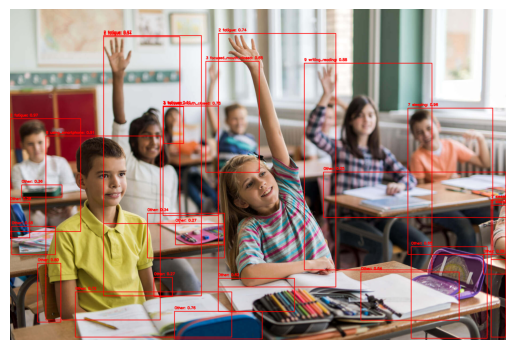

In [21]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load YOLO and classification models
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Function to classify a cropped image using the classification model
def classify_cropped_image(img_crop, model, target_size=(224, 224)):
    img_resized = cv2.resize(img_crop, target_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    prediction = model.predict(img_array)
    predicted_class = class_indices_inverse[np.argmax(prediction[0])]
    probability = np.max(prediction[0])
    return predicted_class, probability

# Load and predict using YOLO
results = yolo_model('class.jpg')  # Replace with your input image path

# Visualize and classify detected objects
fig, ax = plt.subplots()
img = cv2.imread('class.jpg')  # Load the original image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    conf = box.conf[0]

    # Check if the detected class is 'person' (usually class 0 in COCO dataset)
    if cls_id == 0:
        img_crop = img[y1:y2, x1:x2]
        predicted_class, probability = classify_cropped_image(img_crop, classification_model)
        label = f"{predicted_class}: {probability:.2f}"
    else:
        label = f"Other: {conf:.2f}"

    # Draw bounding box and label on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

ax.imshow(img)
plt.axis('off')
plt.show()

# Real-Time Video Detection and Classification

In [24]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load YOLO and classification models
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Function to classify a cropped image using the classification model
def classify_cropped_image(img_crop, model, target_size=(224, 224)):
    img_resized = cv2.resize(img_crop, target_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    prediction = model.predict(img_array)
    predicted_class = class_indices_inverse[np.argmax(prediction[0])]
    probability = np.max(prediction[0])
    return predicted_class, probability

# Process video
input_video_path = 'class_video.mp4'  # Replace with your input video path
output_video_path = 'class_output_video.mp4'  # Output video path
cap = cv2.VideoCapture(input_video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0]

        if cls_id == 0:
            img_crop = frame[y1:y2, x1:x2]
            predicted_class, probability = classify_cropped_image(img_crop, classification_model)
            label = f"{predicted_class}: {probability:.2f}"
        else:
            label = f"Other: {conf:.2f}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 352x640 7 persons, 1 dining table, 1 laptop, 2 books, 3599.8ms
Speed: 3.8ms preprocess, 3599.8ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 38ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 3 books, 2504.8ms
Speed: 2.2ms preprocess, 2504.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 39ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 2 books, 2516.1ms
Speed: 2.3ms preprocess, 2516.1ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 41ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 1 book, 3528.1ms
Speed: 1.8ms preprocess, 3528.1ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 43ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 3 books, 2477.8ms
Speed: 3.7ms preprocess, 2477.8ms inference, 1.5ms postprocess

# Random Frame Extraction and Processing


0: 352x640 7 persons, 1 dining table, 1 laptop, 3 books, 2616.5ms
Speed: 2.0ms preprocess, 2616.5ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 71ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 2 books, 3351.0ms
Speed: 1.7ms preprocess, 3351.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 39ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 1 book, 2501.5ms
Speed: 1.9ms preprocess, 2501.5ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 39ms/step

0: 352x640 7 persons, 1 dining table, 1 laptop, 1 book, 2504.9ms
Speed: 2.6ms preprocess, 2504.9ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 0s 39ms/step

0: 352x640 9 persons, 1 tie, 1 laptop, 2 books, 3087.5ms
Speed: 2.3ms preprocess, 3087.5ms inference, 1.8ms postprocess per image

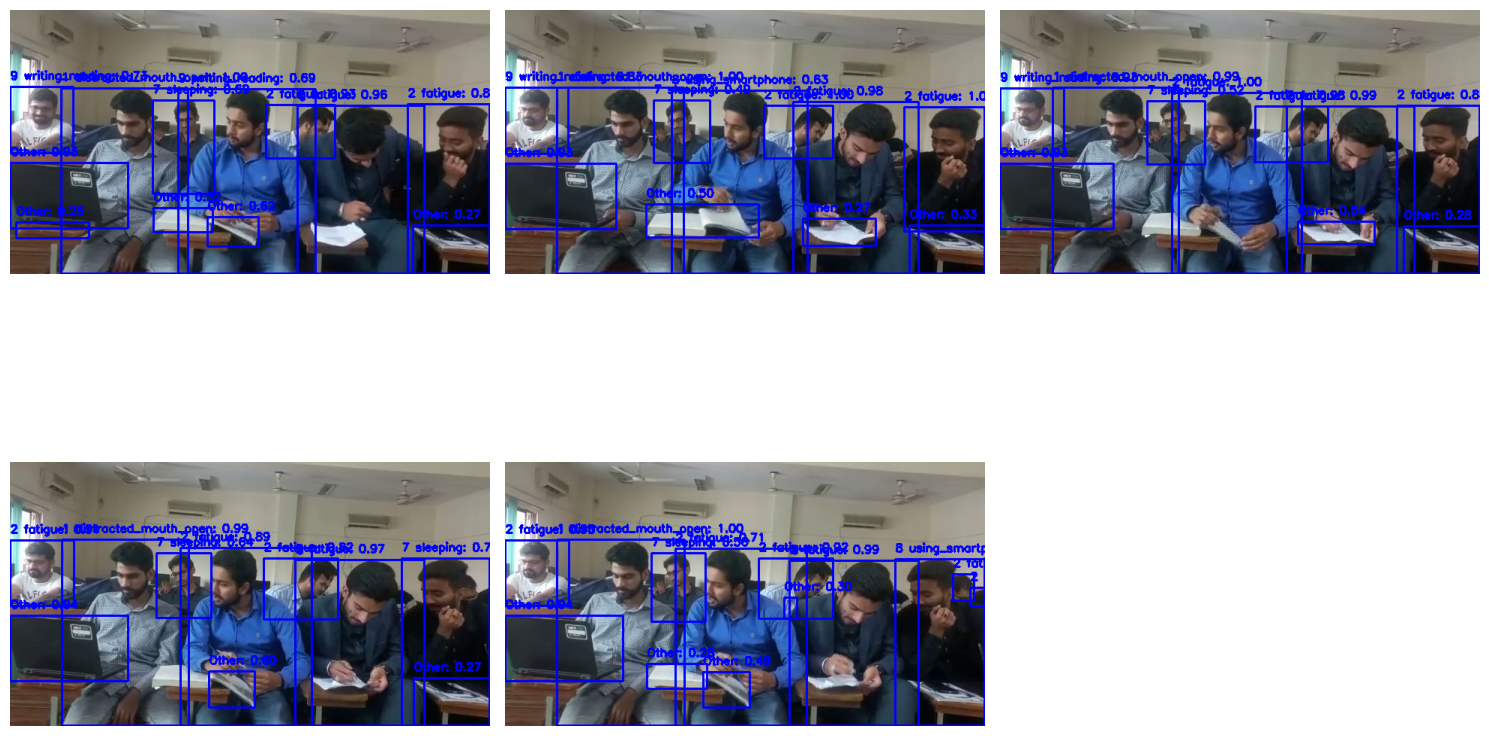

In [26]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

# Load YOLO and classification models
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Function to classify a cropped image using the classification model
def classify_cropped_image(img_crop, model, target_size=(224, 224)):
    img_resized = cv2.resize(img_crop, target_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    prediction = model.predict(img_array)
    predicted_class = class_indices_inverse[np.argmax(prediction[0])]
    probability = np.max(prediction[0])
    return predicted_class, probability

# Function to extract frames from the video
def extract_random_frames(video_path, frames_number):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_indices = sorted(random.sample(range(total_frames), frames_number))
    frames = []

    for index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames

# Function to plot an array of images with a specified number of columns
def plot_images(images, cols=3, figsize=(15, 10)):
    rows = len(images) // cols + (1 if len(images) % cols != 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, img in enumerate(images):
        row, col = divmod(i, cols)
        if rows > 1:
            axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[row, col].axis('off')
        else:
            axes[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[col].axis('off')

    # Remove any empty subplots
    for j in range(len(images), rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

# Main processing
input_video_path = 'class_video.mp4'  # Replace with your input video path
frames_number = 5  # Number of random frames to extract

frames = extract_random_frames(input_video_path, frames_number)
detected_frames = []

for frame in frames:
    results = yolo_model(frame)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0]

        if cls_id == 0:
            img_crop = frame[y1:y2, x1:x2]
            predicted_class, probability = classify_cropped_image(img_crop, classification_model)
            label = f"{predicted_class}: {probability:.2f}"
        else:
            label = f"Other: {conf:.2f}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    detected_frames.append(frame)

plot_images(detected_frames, cols=3)

Yes, you've made significant progress! Here's a summary of the key components that you have successfully implemented:

* **Data Preprocessing and Model Training:**
 * You have set up data preprocessing using ImageDataGenerator.
 * You've trained a classification model to identify different student behaviors using image datasets.

* **Model Evaluation and Saving:**
 * You evaluated the model's performance using validation data.
 * The trained model was saved for later use.

* **Object Detection with YOLO:**
 * Integrated a YOLO model for detecting persons and other objects in images.

* **Image Classification with YOLO:**
 * Combined YOLO's detection with your classification model to classify detected objects in images.

* **Video Processing:**
 * Adapted the YOLO and classification integration to handle video input and output annotated videos.
 * Enhanced the solution to randomly extract frames from a video and classify behaviors within them.

* **Visualization:**
 * Developed a function to visualize and plot multiple images with the detected classes.

You have covered most of the crucial elements required for the lab. The next steps might involve polishing the implementation:

* Ensuring the code runs smoothly on various inputs.
* Enhancing the user interface if needed.
Thorough testing to ensure all edge cases are handled.

# Behavioral Metrics and Recommendations: Video Case

In [ ]:
import cv2
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from collections import Counter

# Load models and labels
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Initialize metrics
engaged_classes = {'focused_mouth_closed', 'focused_mouth_open', 'listening', 'writing_reading'}
distraction_classes = {'distracted_mouth_closed', 'distracted_mouth_open', 'using_smartphone'}
fatigue_classes = {'fatigue'}
device_usage_classes = {'using_smartphone'}

metrics = Counter()
frame_count = 0

# Function to classify cropped image
def classify_cropped_image(img_crop, model, target_size=(224, 224)):
    img_resized = cv2.resize(img_crop, target_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    prediction = model.predict(img_array)
    predicted_class = class_indices_inverse[np.argmax(prediction[0])]
    return predicted_class

# Process video
video_path = 'input_video.mp4'  # Replace with your input video path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame)
    frame_count += 1

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        if cls_id == 0:  # Assuming 'person' class is 0
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            img_crop = frame[y1:y2, x1:x2]
            predicted_class = classify_cropped_image(img_crop, classification_model)

            if predicted_class in engaged_classes:
                metrics['engaged'] += 1
            elif predicted_class in distraction_classes:
                metrics['distracted'] += 1
            elif predicted_class in fatigue_classes:
                metrics['fatigue'] += 1
            elif predicted_class in device_usage_classes:
                metrics['device_usage'] += 1

cap.release()

# Calculate percentages
engaged_rate = metrics['engaged'] / frame_count * 100
distraction_rate = metrics['distracted'] / frame_count * 100
fatigue_rate = metrics['fatigue'] / frame_count * 100
device_usage_rate = metrics['device_usage'] / frame_count * 100

# Print the metrics and recommendations
print(f"Engagement Rate: {engaged_rate:.2f}%")
print(f"Distraction Rate: {distraction_rate:.2f}%")
print(f"Fatigue Rate: {fatigue_rate:.2f}%")
print(f"Device Usage Rate: {device_usage_rate:.2f}%")

# Provide recommendations based on metrics
if distraction_rate > 20:
    print("Recommendation: Reduce distractions by engaging students with interactive teaching strategies.")
if fatigue_rate > 10:
    print("Recommendation: Introduce regular breaks and energizing activities to refresh students.")
if device_usage_rate > 5:
    print("Recommendation: Set clear guidelines for device usage in the classroom.")
if engaged_rate < 70:
    print("Recommendation: Encourage engagement by incorporating group activities and personalized feedback.")

# Behavioral Metrics and Recommendations: Frame Extraction Case


0: 352x640 9 persons, 1 chair, 1 dining table, 2 laptops, 2 books, 2738.0ms
Speed: 2.5ms preprocess, 2738.0ms inference, 3.0ms postprocess per image at shape (1, 3, 352, 640)
1/1 [==============================] - 1s 1s/step
Detected class: 2 fatigue
1/1 [==============================] - 0s 51ms/step
Detected class: 2 fatigue
1/1 [==============================] - 0s 47ms/step
Detected class: 1 distracted_mouth_open
1/1 [==============================] - 0s 51ms/step
Detected class: 2 fatigue
1/1 [==============================] - 0s 56ms/step
Detected class: 2 fatigue
1/1 [==============================] - 0s 41ms/step
Detected class: 0 distracted_mouth_closed
1/1 [==============================] - 0s 40ms/step
Detected class: 0 distracted_mouth_closed
1/1 [==============================] - 0s 42ms/step
Detected class: 7 sleeping
1/1 [==============================] - 0s 42ms/step
Detected class: 2 fatigue

0: 352x640 7 persons, 1 dining table, 1 laptop, 1 book, 2639.3ms
Speed: 3.5m

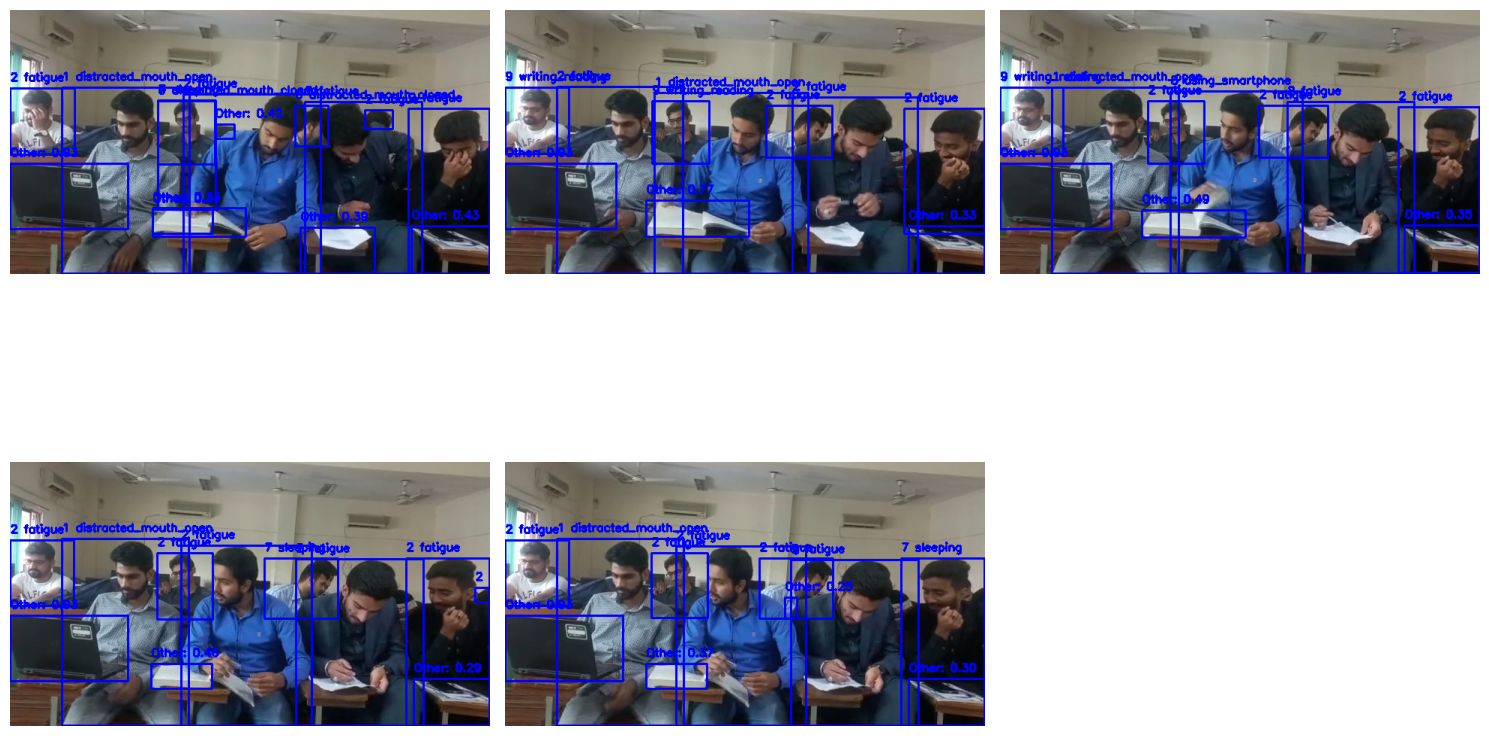

Engagement Rate: 0.00%
Distraction Rate: 0.00%
Fatigue Rate: 0.00%
Device Usage Rate: 0.00%
Recommendation: Encourage engagement by incorporating group activities and personalized feedback.


In [29]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load YOLO and classification models
yolo_model = YOLO('yolov8x.pt')
classification_model = load_model('model.h5')

# Load class labels from labels.txt
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]
class_indices_inverse = {i: label for i, label in enumerate(class_labels)}

# Function to classify a cropped image using the classification model
def classify_cropped_image(img_crop, model, target_size=(224, 224)):
    img_resized = cv2.resize(img_crop, target_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    prediction = model.predict(img_array)
    predicted_class = class_indices_inverse[np.argmax(prediction[0])]
    return predicted_class

# Function to extract frames from the video
def extract_random_frames(video_path, frames_number):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_indices = sorted(random.sample(range(total_frames), frames_number))
    frames = []

    for index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames

# Function to plot an array of images with a specified number of columns
def plot_images(images, cols=3, figsize=(15, 10)):
    rows = len(images) // cols + (1 if len(images) % cols != 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, img in enumerate(images):
        row, col = divmod(i, cols)
        if rows > 1:
            axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[row, col].axis('off')
        else:
            axes[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[col].axis('off')

    # Remove any empty subplots
    for j in range(len(images), rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

# Main processing
input_video_path = 'class_video.mp4'  # Replace with your input video path
frames_number = 5  # Number of random frames to extract

frames = extract_random_frames(input_video_path, frames_number)
detected_frames = []
metrics = Counter()

engaged_classes = {'focused_mouth_closed', 'focused_mouth_open', 'listening', 'writing_reading'}
distraction_classes = {'distracted_mouth_closed', 'distracted_mouth_open', 'using_smartphone'}
fatigue_classes = {'fatigue'}
device_usage_classes = {'using_smartphone'}

for frame in frames:
    results = yolo_model(frame)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0]

        if cls_id == 0:  # Assuming person class is 0
            img_crop = frame[y1:y2, x1:x2]
            predicted_class = classify_cropped_image(img_crop, classification_model)

            print(f"Detected class: {predicted_class}")  # Print detected class

            if predicted_class in engaged_classes:
                metrics['engaged'] += 1
            elif predicted_class in distraction_classes:
                metrics['distracted'] += 1
            elif predicted_class in fatigue_classes:
                metrics['fatigue'] += 1
            elif predicted_class in device_usage_classes:
                metrics['device_usage'] += 1

            label = f"{predicted_class}"
        else:
            label = f"Other: {conf:.2f}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    detected_frames.append(frame)

plot_images(detected_frames, cols=3)

# Calculate percentages
total_frames = frames_number  # Number of frames analyzed
engaged_rate = metrics['engaged'] / total_frames * 100
distraction_rate = metrics['distracted'] / total_frames * 100
fatigue_rate = metrics['fatigue'] / total_frames * 100
device_usage_rate = metrics['device_usage'] / total_frames * 100

# Print the metrics and recommendations
print(f"Engagement Rate: {engaged_rate:.2f}%")
print(f"Distraction Rate: {distraction_rate:.2f}%")
print(f"Fatigue Rate: {fatigue_rate:.2f}%")
print(f"Device Usage Rate: {device_usage_rate:.2f}%")

# Provide recommendations based on metrics
if distraction_rate > 20:
    print("Recommendation: Reduce distractions by engaging students with interactive teaching strategies.")
if fatigue_rate > 10:
    print("Recommendation: Introduce regular breaks and energizing activities to refresh students.")
if device_usage_rate > 5:
    print("Recommendation: Set clear guidelines for device usage in the classroom.")
if engaged_rate < 70:
    print("Recommendation: Encourage engagement by incorporating group activities and personalized feedback.")